# A simple toturial of R package karyoploteR

load package

In [2]:
library("karyoploteR")

# data preparetion

### 第一个文件 chromosome length

In [3]:
#读染色体或contig长度文件，第一列是染色体名称，第二列是染色体起始位置1，第三例是染色体终止位置，也就是染色体长度。
genome <- read.table('chr.len')
genome
#这是一个有28条染色体的基因组

,Chr,Start,Stop
,<chr>,<int>,<int>
1,Chr01,1,287792376
2,Chr02,1,254714493
3,Chr03,1,231030293
4,Chr04,1,130391030
5,Chr05,1,113398843
6,Chr06,1,128157979
7,Chr07,1,109647365
8,Chr08,1,98382032
9,Chr09,1,100758638


### 第二个文件

In [4]:
#第一列是染色体名称，第二列是起始位置1，第三例终止位置，第四列是这个区段的一个深度值，这列作为后续绘图的值。其他列忽略...
data1 <- read.table("hifi.region.tsv")
data1$Chr <- as.factor(data1$Chr)
head(data1)

,Chr,Start,Stop,depth,Median,Coverage,Coverage.FIX.
,<fct>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,Chr01,1,10000,0.00,0,0.00,0.00
2,Chr01,10001,20000,64.86,57,70.03,70.03
3,Chr01,20001,30000,100.00,232,100.00,100.00
4,Chr01,30001,40000,100.00,86,100.00,100.00
5,Chr01,40001,50000,100.00,161,100.00,100.00
6,Chr01,50001,60000,100.00,256,100.00,100.00


### 第三个文件

In [5]:
#这个文件和data1类似
data2 <- read.table("cns.region.tsv")
data2$Chr <- as.factor(data2$Chr)
head(data2)

,Chr,Start,Stop,depth,Median,Coverage,Coverage.FIX.
,<fct>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,Chr01,1,10000,0.00,0,0.00,0.00
2,Chr01,10001,20000,4.48,5,69.96,70.03
3,Chr01,20001,30000,13.21,13,99.85,100.00
4,Chr01,30001,40000,15.44,16,99.64,100.00
5,Chr01,40001,50000,20.36,21,99.91,100.00
6,Chr01,50001,60000,31.14,33,100.00,100.00


### 第4个文件

In [6]:
#第一列是染色体名称，第二列是起始位置，第三例终止位置，第四列是这个区段的一个错误率，后续绘制出染色体位置的错误率
qv <- read.table("qv.err.bed")
names(qv) <- c("Chr","Start","Stop","err")
head(qv)

,Chr,Start,Stop,err
,<chr>,<int>,<int>,<dbl>
1,Chr01,0,10000,0.0025
2,Chr01,10000,20000,0.0058
3,Chr01,20000,30000,0.0000
4,Chr01,30000,40000,0.0022
5,Chr01,40000,50000,0.0000
6,Chr01,50000,60000,0.0000


### 第五个文件，着丝粒位置文件

In [7]:
cen <- read.table('cen.bed')
names(cen) <- c("Chr","Start","Stop")
head(cen)

,Chr,Start,Stop
,<chr>,<int>,<int>
1,Chr01,123492769,129802254
2,Chr02,113645826,116983073
3,Chr03,106782971,109825567
4,Chr04,24535,8702928
5,Chr05,30623,4812347
6,Chr06,12993,9245241


## 绘图
### 先画一个简单的染色体

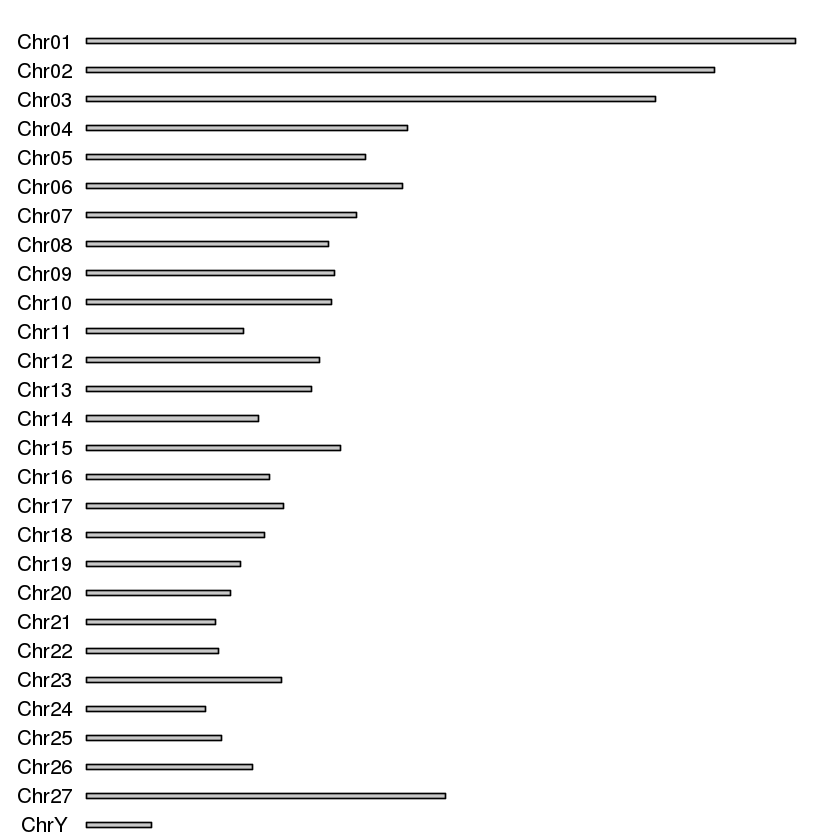

In [8]:
#绘制染色体，genome就是我们读进来的染色体长度文件
p <- plotKaryotype(genome=genome)

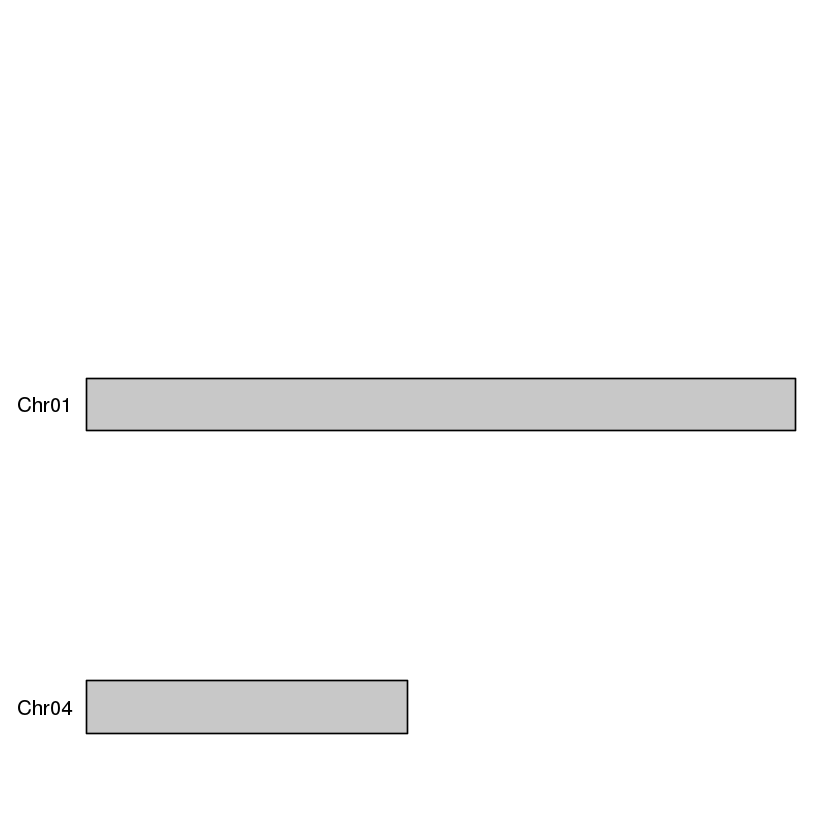

In [9]:
#可以添加参数，如chr可以设置要画的染色体；plot.type 可以设置1，2，3，4，5,等，可以自行试试效果
p2 <- plotKaryotype(genome=genome,chr=c("Chr01","Chr04"),plot.type=1)

In [10]:
#这个染色体画出来的是灰色，不知道怎么调颜色哇，难过😔 想改成白色，于是建了个文件，就是在染色体长度文件加了一列”gieStain“，赋值为gneg，
#读进来看看
cy <- read.table('cytobands.txt')
head(cy)

,Chr,Start,Stop,gieStain
,<chr>,<int>,<int>,<chr>
1,Chr01,1,287792376,gneg
2,Chr02,1,254714493,gneg
3,Chr03,1,231030293,gneg
4,Chr04,1,130391030,gneg
5,Chr05,1,113398843,gneg
6,Chr06,1,128157979,gneg


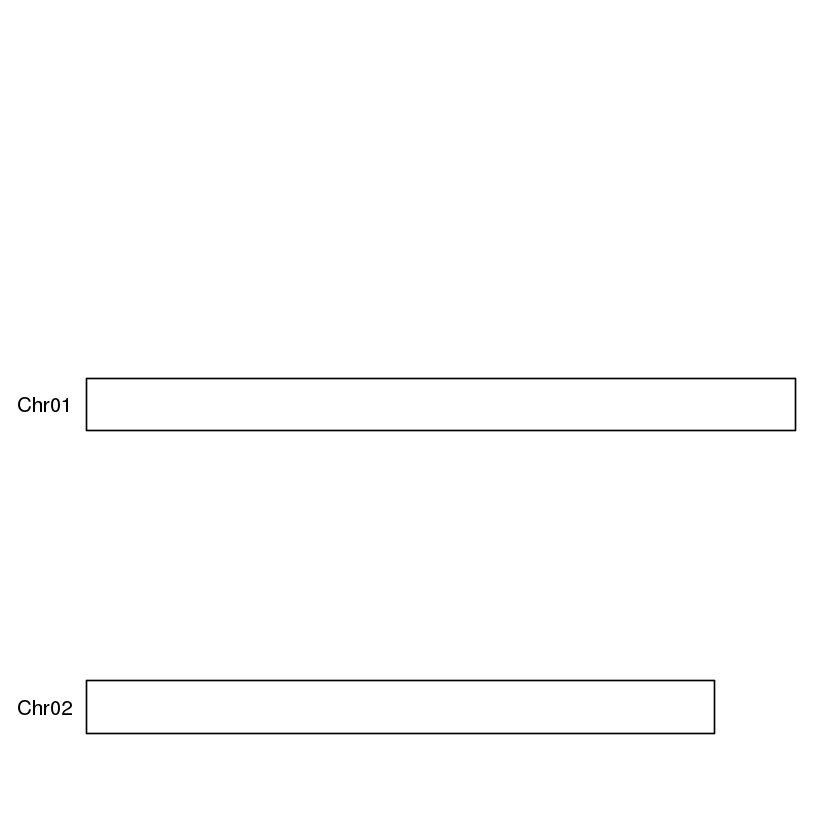

In [11]:
#如下画出白色的染色体啦，主要是为了在染色体加其他的信息更美观
custom.cytobands <- toGRanges("cytobands.txt")
p <- plotKaryotype(genome=genome,chr=c("Chr01","Chr02"),cytobands = custom.cytobands,plot.type=1)

### 接下来把染色体信息画上

#### 画着丝粒

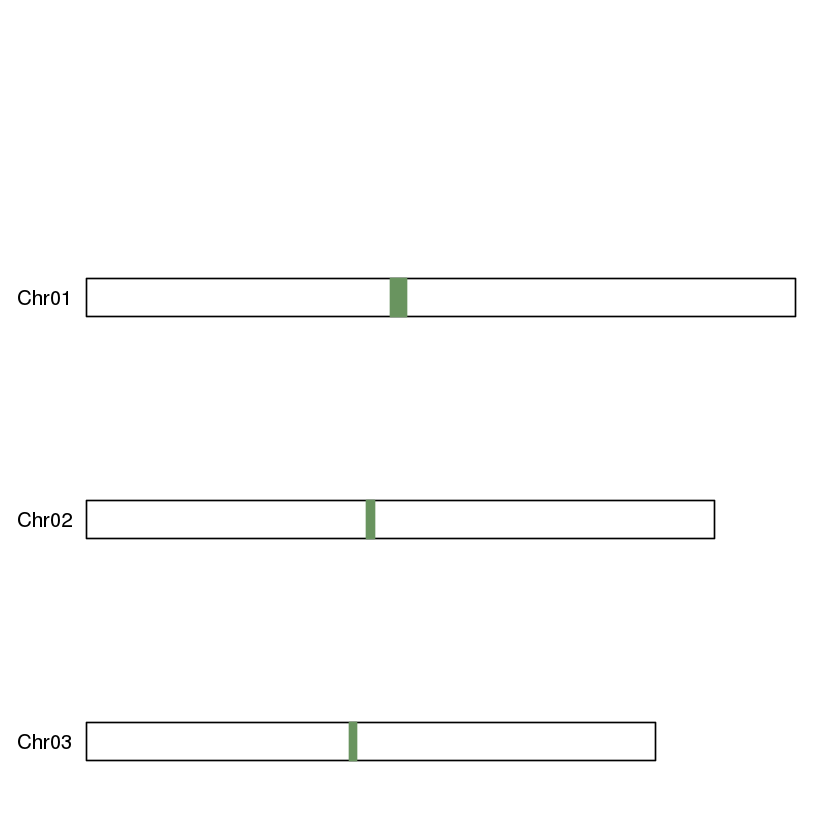

In [12]:
# 画着丝粒位置
p <- plotKaryotype(genome=genome,chr=c("Chr01","Chr02","Chr03"),cytobands = custom.cytobands,plot.type=1)
kpPlotRegions(p,data=cen, data.panel = "ideogram",
              col = "#69945F",
              border= "#69945F",
              r0=0, r1=1)
#kpPlotRegions用来画区域的，在p图的基础上，data给染色体着丝粒文件，data.panel= "ideogram"为画再染色体内，
#col 填充颜色， border边线颜色，r0,r1相对位置，范围0-1

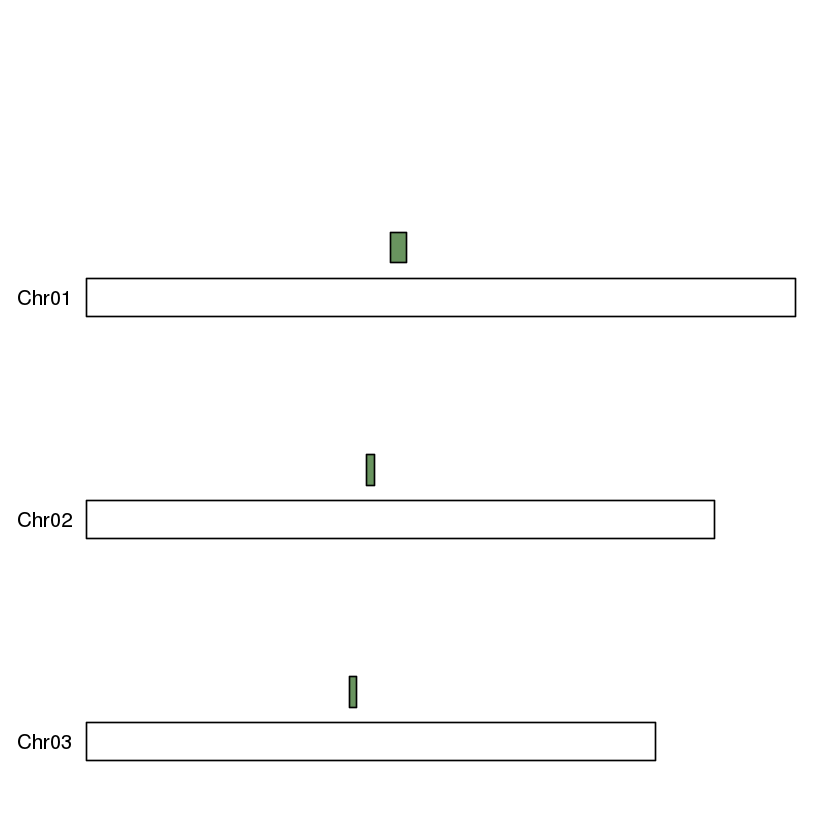

In [13]:
# 改改刚才介绍的参数看看
p <- plotKaryotype(genome=genome,chr=c("Chr01","Chr02","Chr03"),cytobands = custom.cytobands,plot.type=1)
kpPlotRegions(p,data=cen, data.panel = 1,
              col = "#69945F",
              border= "black",
              r0=0, r1=0.2)
#data.panel= 1为画再染色体上边，
#col 填充颜色绿色， border边线颜色黑色。

#### 画data2的第4列

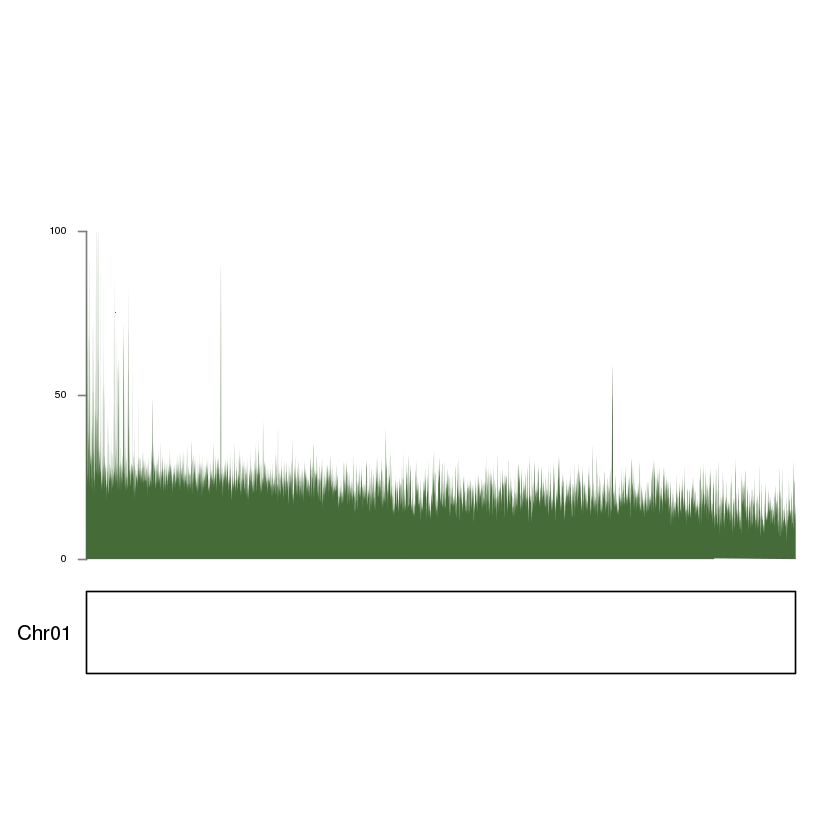

In [14]:
p <- plotKaryotype(genome=genome,chr="Chr01",cytobands = custom.cytobands,plot.type=1)


kpAxis(p, ymin=0, ymax=100, r0=0, r1=1, col="gray50", cex=0.5, numticks = 3, data.panel = 1) #画坐标轴，ymin，ymax是坐标轴范围，col颜色，cex字号，numticks刻度个数
kpArea(p, chr="Chr01", x=data2$Start, y=data2$depth, data.panel = 1, 
       col = "#456B38",
        border= "#456B38",
        ymin=0, ymax=100,
       r0=0, r1=1,lwd=0.01)

# kpArea 可以叫面积图，可以是相当于折线图和坐标轴之间用颜色填充了
#kpArea参数：chr:染色体，x:x值，y:y值，lwd线的粗细，其他和没什么可介绍的

### 把刚才读的文件都画上

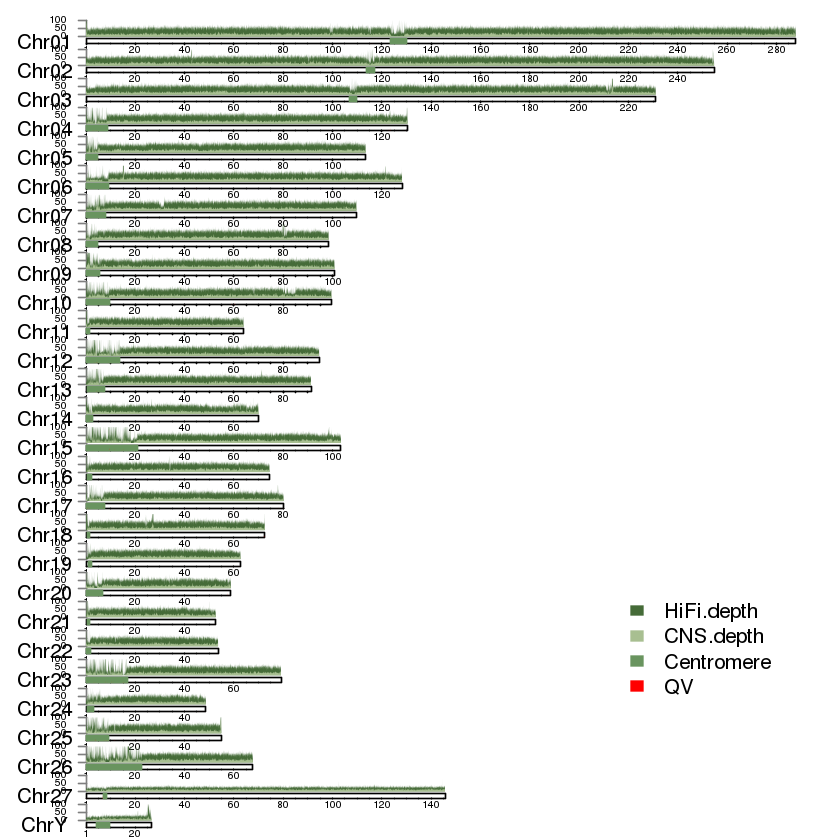

In [15]:
#pdf('plot.pdf',height=20,width=8)

p <- plotKaryotype(genome=genome,cytobands = custom.cytobands,plot.type=1)

kpAddBaseNumbers(p) #染色体上加刻图

kpAxis(p, ymin=0, ymax=100, r0=0, r1=0.8, col="gray50", cex=0.5, numticks = 3, data.panel = 1)


#画data1
kpArea(p, chr=data1$Chr, x=data1$Start, y=data1$depth, data.panel = 1, 
       col = "#456B38",
        border= "#456B38",
        ymin=0, ymax=100,
       r0=0, r1=0.8,lwd=0.01)

#画data2
kpArea(p, chr=data2$Chr, x=data2$Start, y=data2$depth, data.panel = 1, 
       col = "#A8BF91",#"#A8BF91",
        border= "#A8BF91",
        ymin=0, ymax=100,
       r0=0, r1=0.8,lwd=0.01)

#画着丝粒
kpPlotRegions(p,data=cen, data.panel = "ideogram",
              col = "#69945F",
              border= "#69945F",
              r0=0, r1=1)

#画错误率
kpArea(p, chr=qv$Chr, x=qv$Start, y=qv$err,data.panel = "ideogram",
       col = "red",#"#DCC681",
        border= "red",
        ymin=0, ymax=1,
       r0=0, r1=1,lwd=0.01)

#画图例
legend(x="bottomright", border = "white",
       fill = c( "#456B38","#A8BF91","#69945F","red"),
       legend = c("HiFi.depth","CNS.depth","Centromere","QV"),bty="n")

#dev.off()